<a href="https://colab.research.google.com/github/finardi/WatSpeed_LLM_foundation/blob/main/Solution_Module_1_Using_BERT_for_sentence_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1 - Using BERT for sentence classification

This notebook presents an example of how to use a fine-tuned BERT model to perform sentiment analysis. Sentiment analysis, also referred to as opinion mining, is a type of text classification task in Natural Language Processing (NLP) that involves categorizing a piece of text, typically a sentence or a document, into predefined sentiment categories, such as positive, negative, or neutral.


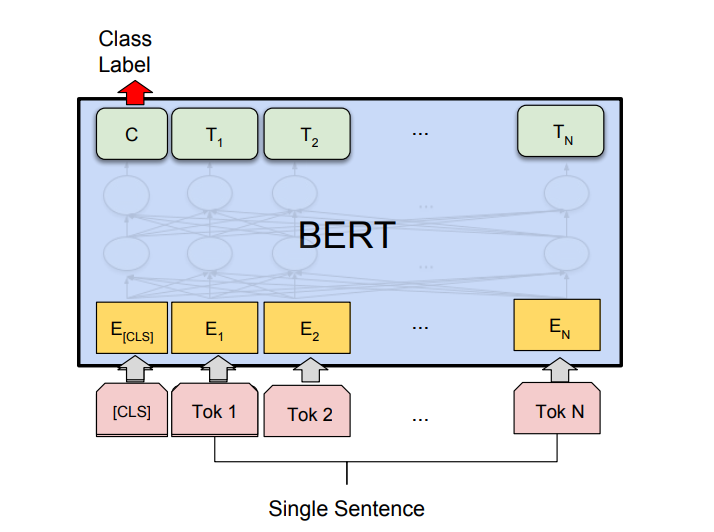

BERT is a powerful deep learning model pre-trained on massive amounts of text data. BERT is a type of transformer-based architecture that can capture the meaning of a sentence by considering the context in which each word appears.

We can fine-tune a pre-trained BERT model on a labeled sentences dataset with their corresponding sentiment categories to use BERT for sentence classification. The fine-tuning process involves training the BERT model on our specific task by feeding it our labeled dataset and adjusting its parameters to improve its performance.

In this example, we use a BERT model that has already been fine-tuned on the Stanford Sentiment Treebank (SST-2). The model and the dataset are available online:
* [Model](https://huggingface.co/jap2/bert-base-sst-2)
* [Dataset](https://huggingface.co/datasets/glue/viewer/sst2/test)

# Installing required packages

In this example, we have to install two libraries:  `transformers` and `datasets`, both from Hugging Face. [Hugging Face](https://huggingface.co/) is an AI startup that has gained significant traction in the NLP community recently. It provides a suite of open-source tools and libraries, making it easy for developers and researchers to work with state-of-the-art NLP models.

**`transformers`**:

Transformers is an open-source library for NLP developed by Hugging Face. It provides state-of-the-art pre-trained models for various NLP tasks, such as text classification, sentiment analysis, question-answering, named entity recognition, etc. The library is built on top of PyTorch and TensorFlow and provides easy-to-use interfaces to access pre-trained models and fine-tune them on specific tasks. The library also provides tools for training custom models and sharing them with the community.

**`datasets`**:

Datasets is another open-source library developed by Hugging Face that provides a collection of preprocessed datasets for various NLP tasks, such as sentiment analysis, natural language inference, machine translation, and many more. The library provides a unified API to access these datasets, making it easy to load, process, and analyze them.

In [1]:
!pip install -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.1 MB/s eta 0:00:00


# Setting the device

In this example, we will use a GPU to speed up the processing of our model. GPUs (Graphics Processing Units) are specialized processors that are optimized for performing large-scale computations in parallel. By using a GPU, we can accelerate the training and inference of a machine learning model, which can significantly reduce the time required to complete these tasks.

Before we begin, we need to check whether a GPU is available and select it as the default device for our PyTorch operations. This is because PyTorch can use either a CPU or a GPU to perform computations, and by default, it will use the CPU. 

For using a GPU in Google Colab: 
1. Click on the "Runtime" menu at the top of the screen.
2. From the dropdown menu, click on "Change runtime type".
3. In the popup window that appears, select "GPU" as the hardware accelerator.
4. Click on the "Save" button.

That's it! Now you can use the GPU for faster computations in your notebook. 

In [2]:
!nvidia-smi

Tue May  2 22:39:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch

if torch.cuda.is_available(): 
   dev = "cuda:0"
else: 
   dev = "cpu"
device = torch.device(dev)
print('Using {}'.format(device))

Using cuda:0


# Downloading Dataset

The SST-2 dataset, or the Stanford Sentiment Treebank, is popular for sentiment analysis tasks in Natural Language Processing (NLP). It consists of movie reviews from the Rotten Tomatoes website that are labeled with either a positive or negative sentiment. The dataset contains 10,662 sentence-level movie reviews, with approximately half of the reviews labeled as positive and the other half labeled as negative. The reviews are also relatively evenly distributed in length, with a median length of 18 tokens.

The SST-2 dataset has become a benchmark dataset for sentiment analysis in NLP, and many researchers use it to evaluate the performance of their models. The dataset's popularity is partly due to its high-quality labels and the task's relative simplicity, making it an accessible starting point for researchers and developers new to NLP.

In this example, we're using the **`datasets`** library to download and load the validation set of the dataset.

In the last two lines of code, we are preparing the validation dataset for evaluation. Firstly, we map the 'label' column to a new column named 'labels' using the **`map()`** method, which is required for evaluation. Then, we remove the 'label' column using the **`remove_columns()`** method to ensure that the validation set has only the input sequences and the associated labels that the model is supposed to predict during evaluation.

In [4]:
from datasets import load_dataset

test_dataset = load_dataset('glue', 'sst2', split='validation')

test_dataset = test_dataset.map(lambda example: {'labels': example['label']}, batched=True)
test_dataset = test_dataset.remove_columns(['label'])

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In this code, we use the **`pandas`** library to import the SST-2 dataset and show the first 10 examples using the **`df.head(10)`** method. The dataset contains examples labeled as either 0 or 1, representing negative and positive, respectively. For instance, the first example is labeled as 1, which means it is a positive example. It reads "it's a charming and often affecting journey," while the second example is labeled as 0, meaning it is a negative example. It reads "unflinchingly bleak and desperate." This way, you can have a quick overview of the dataset and its labeling.

In [5]:
import pandas as pd

df = pd.DataFrame(test_dataset)
df.head(10)

,sentence,idx,labels
0,it 's a charming and often affecting journey .,0,1
1,unflinchingly bleak and desperate,1,0
2,allows us to hope that nolan is poised to emba...,2,1
3,"the acting , costumes , music , cinematography...",3,1
4,"it 's slow -- very , very slow .",4,0
5,although laced with humor and a few fanciful t...,5,1
6,a sometimes tedious film .,6,0
7,or doing last year 's taxes with your ex-wife .,7,0
8,you do n't have to know about music to appreci...,8,1
9,"in exactly 89 minutes , most of which passed a...",9,0


# Downloading the model

We utilize the **`transformers`** library to load the sentiment analysis fine-tuned BERT model. In this example, we are using two classes from the **`transformers`** library: **`AutoTokenizer`** and **`AutoModelForSequenceClassification`**.

The **`AutoTokenizer`** class is used to tokenize input text data in preparation for use with the BERT model. It is instantiated with a pre-trained tokenizer, in this case "`bert-base-uncased`", trained on the lower-cased English text. The **`AutoModelForSequenceClassification`** class is used to load a pre-trained BERT model fine-tuned for sequence classification, in this case "`jap2/bert-base-sst-2`". This pre-trained model has been fine-tuned on the SST-2 dataset for sentiment analysis, and it can classify input text into two sentiment categories: positive or negative.

**`model.to(device)`** moves the model's parameters and computation to the device specified by the device variable. In this case, device represents either the CPU or the GPU, depending on the availability of the GPU on the system. By moving the model to the device, we can perform the computations required for training or inference on that device, which can greatly improve the speed of the processing.




In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

model = AutoModelForSequenceClassification.from_pretrained("jap2/bert-base-sst-2")

model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

# Model Evaluation

## Data preparation

To evaluate the performance of the fine-tuned BERT model for sentiment analysis, we use the SST-2 dataset as a benchmark. Before running the evaluation, we need to prepare the test dataset by tokenizing the data and converting it to a format that can be processed by the model.

To tokenize the test dataset, we use the same tokenizer object that was used for the fine-tuning process. We then convert the tokenized data to the torch format, which is a format that can be processed by PyTorch, a popular machine learning framework. 

The code provided below applies the tokenizer to each sentence in the test dataset and sets the padding and truncation parameters to ensure that each sentence is of equal length. The resulting tokenized data is then converted to the torch format, with the **`input_ids`**, **`token_type_ids`**, **`attention_mask`**, and **`labels`** columns being specified. This format is suitable for feeding into the fine-tuned BERT model for inference and evaluating its performance on the test dataset.

In [7]:
MAX_LENGTH = 128 #  maximum length of the tokenized sentences

test_dataset = test_dataset.map(lambda e: tokenizer(e['sentence'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

The **`set_format()`** method is called on the dataset object to convert the dataset to the PyTorch tensor format, which is required by the BERT model.

The columns argument specifies which columns in the dataset should be included in the PyTorch format. In this case, the **`input_ids`**, **`token_type_ids`**, **`attention_mask`**, and **`labels`** columns are included. These columns correspond to the inputs and labels that the BERT model expects for sequence classification tasks.

In [8]:
test_dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'labels'])

Each example of the dataset consists of a dictionary with the following keys:
* **`labels`**: This is the label for the sample. It is a tensor with value 1 (positive example) in this case.
* **`input_ids`**: This is a tensor of integers representing the tokenized and encoded input text. The input text has been broken down into individual words, and each word has been assigned a unique integer identifier. The tensor has a length of 128, which means that the input text has been truncated or padded with zeros to fit this length.
* **`token_type_ids`**: This is a tensor of integers indicating which part of the input text each token belongs to. In this case, all tokens belong to the same segment of text, so the tensor contains only zeros.
* **`attention_mask`**: This is a tensor of ones and zeros indicating which elements of **`input_ids`** should be attended to by the NLP model. The ones represent the actual tokens in the input text, while the zeros represent the padding added to achieve the length of 128.


In [9]:
test_dataset[0]

{'labels': tensor(1),
 'input_ids': tensor([  101,  2009,  1005,  1055,  1037, 11951,  1998,  2411, 12473,  4990,
          1012,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,  

We use the PyTorch's **`DataLoader`** class to create a data loader for evaluating a machine learning model on a test dataset. The data loader will load the test dataset in batches of 256 samples at a time.

The **`DataLoader`** class is a PyTorch utility that helps you efficiently load and preprocess data in batches from a dataset.

The **`batch_size`** parameter specifies the number of samples to load in each batch. Loading data in batches is important because it allows you to efficiently use the memory of your machine learning system. When you have a large dataset that doesn't fit into the memory of your system, loading the entire dataset at once would cause an out of memory error.

In [10]:
from torch.utils.data import DataLoader
eval_dataloader = DataLoader(test_dataset, batch_size=256)

## Inference

In the following cell, we perform the inference stage of the evaluation using fine-tuned model to make predictions on the test dataset. 

Firstly, we import necessary libraries like **`torch`**, **`datasets`**, **`load_metric`**, and **`tqdm`**. We load the accuracy metric using the **`load_metric`** function from the datasets library. 
**`load_metric`** is a function from the Hugging Face's datasets library that provides a convenient way to load various evaluation metrics for natural language processing tasks. It allows users to easily import and use standard evaluation metrics, such as accuracy, F1 score, and perplexity, in their machine learning pipelines. 

Then we set the model to evaluation mode using **`model.eval()`**. Next, we loop over the test dataset using a DataLoader object with a batch size of 256. Inside the loop, it prepares the batch by creating a dictionary of keys and values and moves the data to the GPU using the to() method. We then use **`torch.no_grad()`** to avoid tracking gradients, since we are not training the model. The model makes predictions on the batch using the `model(**batch)` method. 

We then extract the logits from the output and use torch.argmax to get the predicted class label for each example. 

Finally, we update the metric object by adding the batch predictions and corresponding true labels to it using **`metric.add_batch()`** and compute the overall accuracy using **`metric.compute()`**.

In [11]:
import torch
from datasets import load_metric
from tqdm import tqdm

metric= load_metric("accuracy")
model.eval()
for batch in tqdm(eval_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

<ipython-input-11-952017e90c9d>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric= load_metric("accuracy")


100%|██████████| 4/4 [00:08<00:00,  2.07s/it]


{'accuracy': 0.9243119266055045}

# Try it yourself

You can try sentiment analysis with your own sentences by providing the input text as a string to the **`text`** variable in the code snippet provided below.

Once the text is provided, the **`tokenizer`** function will tokenize the text and convert it into a PyTorch tensor. The tokenizer function takes the input text as its argument and returns a dictionary containing the tokenized text as tensors. The **`return_tensors`** argument specifies that the function should return the output in PyTorch tensor format.

The tokenized input is then passed to the model to obtain the output logits. The output logits are a tensor of size **`1x2`**, where the first element corresponds to the negative sentiment score and the second element corresponds to the positive sentiment score.

The **`argmax()`** function is used to obtain the index of the element with the highest score, which is used to determine the sentiment of the input text. The **`class_label`** variable is set to either **"negative"** or **"positive"** based on the sentiment score, and it is printed to the console. Users can try different input texts and observe how the model performs on them.

In [12]:
text = "This movie is awesome!" # @param

input = tokenizer(text, return_tensors="pt")
output = model(**input.to(device)) # notice that the input is moved to the device (GPU)
label_id = output.logits.argmax()
class_label = ["negative","positive"][label_id]
print(f"The sentence '{text}' is classified as '{class_label}'.")

The sentence 'This movie is awesome!' is classified as 'positive'.


# Analyzing the outputs

The model's output contains information about the loss, logits, hidden states, and attentions. In this case, the loss is **`None`**, which means that the model did not calculate the loss during inference since the labels are not input to the model during this stage. The logits are a tensor of shape **`(1, 2)`** that represent the unnormalized scores for each class and can be transformed into probabilities by applying the **`softmax`** function. The hidden states and attentions are **`None`**, but one can choose to output them during inference by setting the **`output_hidden_states`** parameter to **`True`** when instantiating the Huggin Face transformers model.




In [13]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-3.0367,  3.7320]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

## Applying the activation function

The softmax function is a mathematical function that converts a vector of real numbers into a probability distribution. In the context of deep learning, it is typically applied to the output of the last linear layer of a neural network, which contains the logits or raw scores that are transformed into probabilities.

In the code below, **`torch.softmax`** is a PyTorch function that applies the softmax operation along a specific dimension of a tensor. The first argument is the tensor to which the softmax function is applied, and the second argument specifies the dimension along which the function is applied. In this case, the **`dim=1`** argument means that the function is applied along the second dimension of the logits tensor, which represents the different classes in our classification task. The resulting tensor contains the probabilities for each class.

In [14]:
import torch
torch.softmax(output["logits"], dim=1)

tensor([[0.0011, 0.9989]], device='cuda:0', grad_fn=<SoftmaxBackward0>)